In [1]:
import argparse
import numpy as np
import time
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import os
import sys
from scipy import signal
import skinematics as skin
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
#from scipy import signal
from taskcaller import taskcaller
from taskcaller_train1 import taskcaller_train1
import random
# modularized library import
from train_test_split_k import train_test_split_k
from rms import rms    
from copy import copy
from datetime import datetime
from maml import *

from math import pi
from math import cos
from math import floor

In [2]:
dtype="float64"
tf.keras.backend.set_floatx(dtype)
print('Python version: ', sys.version)
print('Tensorflow version: ', tf.__version__)

Python version:  3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
Tensorflow version:  2.2.0


## Import Dataset

In [3]:
S=30
# np.random.seed(S)
# random.seed(S)
# tf.random.set_seed(S)

system_rate = 60
k_train = 100
x_train1, t_train1, x_val1, t_val1,input_nm, target_nm, data_length, DELAY_SIZE, train_eule_data, anticipation_size, train_time_data = taskcaller_train1('../dataset/trainingtask1.csv', system_rate, k_train)
x_train2, t_train2, x_val2, t_val2,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask2.csv', system_rate, k_train)
x_train3, t_train3, x_val3, t_val3,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask3.csv', system_rate, k_train)
x_train4, t_train4, x_val4, t_val4, _, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask4.csv', system_rate, k_train)
x_train5, t_train5, x_val5, t_val5,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask5.csv', system_rate, k_train)
x_train6, t_train6, x_val6, t_val6,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask6.csv', system_rate, k_train)
x_train7, t_train7, x_val7, t_val7,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask7.csv', system_rate, k_train)
x_train8, t_train8, x_val8, t_val8,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask8.csv', system_rate, k_train)
x_train9, t_train9, x_val9, t_val9,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask9.csv', system_rate, k_train)
x_train10, t_train10, x_val10, t_val10,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask9.csv', system_rate, k_train)
#x_seq10, t_seq10, _, _,_, _, _, _, _, _, _ = taskcaller('trainingtask10.csv', system_rate, k)


traintaskx = [x_train1 , x_train2 , x_train3 , x_train4,x_train5,x_train6,x_train7,x_train8,x_train9,x_train10]
traintaskt = [t_train1 , t_train2 , t_train3 , t_train4,t_train5,t_train6,t_train7, t_train8, t_train9,t_train10]

valtaskx = [x_val1,x_val2,x_val3,x_val4,x_val5,x_val6,x_val7,x_val8,x_val9,x_val10]
valtaskt = [t_val1,t_val2,t_val3,t_val4,t_val5,t_val6,t_val7,t_val8,t_val9,t_val10]

numberoftask = len(traintaskx)

../dataset/trainingtask1.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask2.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask3.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask4.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask5.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask6.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask7.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask8.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask9.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask9.csv loaded...

Anticipation time: 300ms



In [4]:
ftml1 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [5]:
ftml2 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [6]:
ftml3 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [7]:
ftml4 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [8]:
ftml5 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [9]:
ftml6 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [10]:
def update_procedure(model,dtx, dty, lr = 0.001, grad_step =10):
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
    all_loss = []
    for step in range (grad_step):
        total_loss = 0
        for i in range(len(dtx)):
            with tf.GradientTape() as update:
                _,loss = model_func(model, dtx[i], dty[i])
            gradient = update.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradient, model.trainable_variables))
            total_loss+=loss
        all_loss.append(total_loss/len(dtx))
        print('Step{} : loss = {}'.format(step,total_loss/len(dtx)))
    return model, all_loss  

## Normal

In [11]:

meta_step = 10
loss_ftml1 = []
total = []
all_eval_loss1 = []
all_train_loss1 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval1 = []
ftml_time1 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml1, loss = train_maml(ftml1, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml1, loss = update_procedure(ftml1,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml1, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time1.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval1.append(eval_loss)
    all_train_loss1.append(train_loss)
    all_eval_loss1.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 6.636044502258301
Step 1 : loss = 6.599644184112549
Step 2 : loss = 6.564398765563965
Step 3 : loss = 6.530827522277832
Step 4 : loss = 6.499093055725098
Step 5 : loss = 6.468135356903076
Step 6 : loss = 6.43837833404541
Step 7 : loss = 6.410154819488525
Step 8 : loss = 6.382833480834961
Step 9 : loss = 6.3578267097473145
Update Procedure
Step0 : loss = 6.335638523101807
Step1 : loss = 6.311988353729248
Step2 : loss = 6.289517879486084
Step3 : loss = 6.267335891723633
Step4 : loss = 6.244971752166748
Step5 : loss = 6.222333908081055
Step6 : loss = 6.199236869812012
Step7 : loss = 6.175698757171631
Step8 : loss = 6.151828765869141
Step9 : loss = 6.127430438995361
Data stream Batch- 0 : loss = 4.7126970291137695
Meta Update
Training is starting
Step 0 : loss = 6.544381141662598
Step 1 : loss = 6.519930601119995
Step 2 : loss = 6.494837045669556
Step 3 : loss = 6.469096899032593
Step 4 : loss = 6.44270658493042
Step 5 : loss = 6.415

Step8 : loss = 2.7476086616516113
Step9 : loss = 2.7094858487447104
Data stream Batch- 2 : loss = 12.482130527496338
Meta Update
Training is starting
Step 0 : loss = 1.4252524971961975
Step 1 : loss = 1.414524177710215
Step 2 : loss = 1.4039888381958008
Step 3 : loss = 1.3936014274756112
Step 4 : loss = 1.383441835641861
Step 5 : loss = 1.3734188377857208
Step 6 : loss = 1.3634383579095206
Step 7 : loss = 1.353450745344162
Step 8 : loss = 1.3434225420157113
Step 9 : loss = 1.333305905262629
Update Procedure
Step0 : loss = 2.4277786314487457
Step1 : loss = 2.3429437279701233
Step2 : loss = 2.289548546075821
Step3 : loss = 2.2473422288894653
Step4 : loss = 2.207897335290909
Step5 : loss = 2.1703985929489136
Step6 : loss = 2.13459649682045
Step7 : loss = 2.1019586622714996
Step8 : loss = 2.071392148733139
Step9 : loss = 2.0423708260059357
Data stream Batch- 3 : loss = 12.3164701461792
Meta Update
Training is starting
Step 0 : loss = 1.2984907428423562
Step 1 : loss = 1.2866954008738198
St

Step 8 : loss = 1.219867211603929
Step 9 : loss = 1.210934580377643
Update Procedure
Step0 : loss = 3.6482561429341636
Step1 : loss = 3.2767850955327353
Step2 : loss = 3.20331076780955
Step3 : loss = 3.1543696920077005
Step4 : loss = 3.068406899770101
Step5 : loss = 2.9923574924468994
Step6 : loss = 2.9175736705462136
Step7 : loss = 2.838784098625183
Step8 : loss = 2.765015165011088
Step9 : loss = 2.6900635162989297
Data stream Batch- 5 : loss = 3.603607416152954
Meta Update
Training is starting
Step 0 : loss = 1.1695804120085778
Step 1 : loss = 1.159988470340059
Step 2 : loss = 1.1503836060001973
Step 3 : loss = 1.1405738222959731
Step 4 : loss = 1.1307631529601556
Step 5 : loss = 1.1208164609436477
Step 6 : loss = 1.1107337645535904
Step 7 : loss = 1.100709849782288
Step 8 : loss = 1.0905339399766592
Step 9 : loss = 1.0802129863717016
Update Procedure
Step0 : loss = 3.031899333000183
Step1 : loss = 2.659333654812404
Step2 : loss = 2.555707028933934
Step3 : loss = 2.4403527975082397
S

Step9 : loss = 1.6324445940554142
Data stream Batch- 7 : loss = 2.2990596890449524
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.05195784747161479
Step 1 : loss = 0.04274157677385883
Step 2 : loss = 0.03889429500102279
Step 3 : loss = 0.038594548218860755
Step 4 : loss = 0.038149504758086906
Step 5 : loss = 0.03780651759762069
Step 6 : loss = 0.03746893407312251
Step 7 : loss = 0.03742884833425235
Step 8 : loss = 0.03703537747770609
Step 9 : loss = 0.03686554349522661
Update Procedure
Step0 : loss = 3.907682418823242
Step1 : loss = 3.8033857345581055
Step2 : loss = 3.7032968997955322
Step3 : loss = 3.6059951782226562
Step4 : loss = 3.509758949279785
Step5 : loss = 3.4143426418304443
Step6 : loss = 3.3201282024383545
Step7 : loss = 3.227393388748169
Step8 : loss = 3.1356918811798096
Step9 : loss = 3.044569730758667
Data stream Batch- 0 : loss = 3.8328851461410522
Meta Update
Training is starting
Step 0 : loss = 0.08603333745775012
Step 1 : loss = 0.07416880103154115
Step 2 

Step 4 : loss = 0.027987393835516315
Step 5 : loss = 0.026556538906149164
Step 6 : loss = 0.02574941112933226
Step 7 : loss = 0.024863257736751354
Step 8 : loss = 0.0242103319701241
Step 9 : loss = 0.023628066428099937
Update Procedure
Step0 : loss = 2.0026952425638833
Step1 : loss = 1.837168018023173
Step2 : loss = 1.6833418607711792
Step3 : loss = 1.5321593880653381
Step4 : loss = 1.4428645968437195
Step5 : loss = 1.4045285781224568
Step6 : loss = 1.3435184359550476
Step7 : loss = 1.2956259449323018
Step8 : loss = 1.251918355623881
Step9 : loss = 1.228247384230296
Data stream Batch- 2 : loss = 3.7562496662139893
Meta Update
Training is starting
Step 0 : loss = 0.04011266674253912
Step 1 : loss = 0.03707378704531653
Step 2 : loss = 0.03448373345807529
Step 3 : loss = 0.0321820451713297
Step 4 : loss = 0.030010731217465652
Step 5 : loss = 0.028252638025569092
Step 6 : loss = 0.02687320549373844
Step 7 : loss = 0.026050744822746424
Step 8 : loss = 0.025428979513501572
Step 9 : loss = 0.

Step2 : loss = 0.8865424990653992
Step3 : loss = 0.7006056785583497
Step4 : loss = 0.6011119484901428
Step5 : loss = 0.5762968122959137
Step6 : loss = 0.5309692740440368
Step7 : loss = 0.501958578824997
Step8 : loss = 0.4921887755393982
Step9 : loss = 0.4767905831336975
Data stream Batch- 4 : loss = 3.6559855937957764
Meta Update
Training is starting
Step 0 : loss = 0.15812930213103096
Step 1 : loss = 0.14917788630571568
Step 2 : loss = 0.14034772345775698
Step 3 : loss = 0.13164188474164085
Step 4 : loss = 0.12325905962389372
Step 5 : loss = 0.11498639047776345
Step 6 : loss = 0.1069983360943777
Step 7 : loss = 0.09923045392964895
Step 8 : loss = 0.09234515485255751
Step 9 : loss = 0.08706756692580135
Update Procedure
Step0 : loss = 1.215668131907781
Step1 : loss = 0.98565640548865
Step2 : loss = 0.9073322465022405
Step3 : loss = 0.8634670525789261
Step4 : loss = 0.8255326971411705
Step5 : loss = 0.7987057367960612
Step6 : loss = 0.7730216135581335
Step7 : loss = 0.751571441690127
Ste

Step 0 : loss = 0.035091733480752646
Step 1 : loss = 0.03261014436820844
Step 2 : loss = 0.030339161605565435
Step 3 : loss = 0.028396227575070505
Step 4 : loss = 0.026841618430442842
Step 5 : loss = 0.02579427214337602
Step 6 : loss = 0.025208259078287276
Step 7 : loss = 0.024684069323911317
Step 8 : loss = 0.024109495729655876
Step 9 : loss = 0.023596451489303814
Update Procedure
Step0 : loss = 0.8186334855854511
Step1 : loss = 0.6369768418371677
Step2 : loss = 0.5956894233822823
Step3 : loss = 0.5853347890079021
Step4 : loss = 0.5654057133942842
Step5 : loss = 0.5590593740344048
Step6 : loss = 0.5573055502027273
Step7 : loss = 0.5491935322061181
Step8 : loss = 0.5474064145237207
Step9 : loss = 0.5483461674302816
Data stream Batch- 7 : loss = 1.4190834164619446
Task  8
Meta Update
Training is starting
Step 0 : loss = 0.027326731570121474
Step 1 : loss = 0.02601044732797915
Step 2 : loss = 0.02595188310980655
Step 3 : loss = 0.026024517540043392
Step 4 : loss = 0.025737458754573082
St

Step 5 : loss = 0.10243865129207483
Step 6 : loss = 0.10023516456513369
Step 7 : loss = 0.09824395944483662
Step 8 : loss = 0.09626256135836031
Step 9 : loss = 0.09430168493155588
Update Procedure
Step0 : loss = 1.1467238664627075
Step1 : loss = 0.9741325974464417
Step2 : loss = 0.8816762566566467
Step3 : loss = 0.8348325788974762
Step4 : loss = 0.7862659096717834
Step5 : loss = 0.7385463118553162
Step6 : loss = 0.6943961679935455
Step7 : loss = 0.6568887233734131
Step8 : loss = 0.6226429343223572
Step9 : loss = 0.5960960686206818
Data stream Batch- 1 : loss = 1.9136940240859985
Meta Update
Training is starting
Step 0 : loss = 0.11157894595206619
Step 1 : loss = 0.10841921390870309
Step 2 : loss = 0.10545207378180277
Step 3 : loss = 0.1026555424867838
Step 4 : loss = 0.09995257434103583
Step 5 : loss = 0.09742317834835698
Step 6 : loss = 0.09521100179500878
Step 7 : loss = 0.09315100037282592
Step 8 : loss = 0.09119866150404886
Step 9 : loss = 0.08934367496696202
Update Procedure
Step0

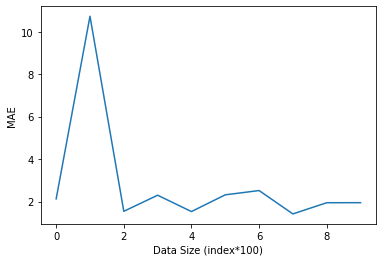

In [12]:
plt.figure(1)   
plt.plot(ftml_eval1)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [13]:
print(len(xtask_buffer))

80


## Fixed

In [14]:

meta_step = 10
loss_ftml2 = []
total = []
all_eval_loss2 = []
all_train_loss2 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval2 = []
ftml_time2 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()
    if len(xtask_buffer) >= 24:
        xtask_buffer = xtask_buffer[8:]
        ttask_buffer = ttask_buffer[8:] 


    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml2, loss = train_maml(ftml2, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml2, loss = update_procedure(ftml2,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml2, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time2.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval2.append(eval_loss)
    all_train_loss2.append(train_loss)
    all_eval_loss2.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 6.545587539672852
Step 1 : loss = 6.515254020690918
Step 2 : loss = 6.4830780029296875
Step 3 : loss = 6.450227737426758
Step 4 : loss = 6.418649673461914
Step 5 : loss = 6.3877153396606445
Step 6 : loss = 6.356893539428711
Step 7 : loss = 6.326321601867676
Step 8 : loss = 6.29616641998291
Step 9 : loss = 6.266261577606201
Update Procedure
Step0 : loss = 6.239593505859375
Step1 : loss = 6.210954666137695
Step2 : loss = 6.182104110717773
Step3 : loss = 6.153231143951416
Step4 : loss = 6.123839855194092
Step5 : loss = 6.0941338539123535
Step6 : loss = 6.0646514892578125
Step7 : loss = 6.036095142364502
Step8 : loss = 6.007641792297363
Step9 : loss = 5.978973865509033
Data stream Batch- 0 : loss = 4.652566432952881
Meta Update
Training is starting
Step 0 : loss = 6.368473052978516
Step 1 : loss = 6.336023569107056
Step 2 : loss = 6.304598331451416
Step 3 : loss = 6.273451089859009
Step 4 : loss = 6.242862701416016
Step 5 : loss = 6.

Step7 : loss = 2.0620625813802085
Step8 : loss = 2.020460287729899
Step9 : loss = 1.9805867274602253
Data stream Batch- 2 : loss = 10.292473793029785
Meta Update
Training is starting
Step 0 : loss = 0.6007946332295735
Step 1 : loss = 0.5883595248063405
Step 2 : loss = 0.5784978022178013
Step 3 : loss = 0.569988951086998
Step 4 : loss = 0.5624235222736995
Step 5 : loss = 0.5550518135229747
Step 6 : loss = 0.5476716607809067
Step 7 : loss = 0.5402702341477077
Step 8 : loss = 0.5328943729400635
Step 9 : loss = 0.5254994332790375
Update Procedure
Step0 : loss = 1.91062331199646
Step1 : loss = 1.8169136345386505
Step2 : loss = 1.76819708943367
Step3 : loss = 1.7300096452236176
Step4 : loss = 1.6928526163101196
Step5 : loss = 1.6645488142967224
Step6 : loss = 1.6386786699295044
Step7 : loss = 1.6143961548805237
Step8 : loss = 1.5912862420082092
Step9 : loss = 1.569420039653778
Data stream Batch- 3 : loss = 10.271825313568115
Meta Update
Training is starting
Step 0 : loss = 0.5595229466756184

Step 5 : loss = 0.4820317145614397
Step 6 : loss = 0.46533892538457633
Step 7 : loss = 0.4488435779239923
Step 8 : loss = 0.4321058873382826
Step 9 : loss = 0.41520166338554454
Update Procedure
Step0 : loss = 2.46844615538915
Step1 : loss = 1.9919015566507976
Step2 : loss = 1.8712401390075684
Step3 : loss = 1.7919115920861561
Step4 : loss = 1.7354961335659027
Step5 : loss = 1.688893844683965
Step6 : loss = 1.6306771337985992
Step7 : loss = 1.592351923386256
Step8 : loss = 1.5546343823273976
Step9 : loss = 1.5244939525922139
Data stream Batch- 5 : loss = 3.0561466217041016
Meta Update
Training is starting
Step 0 : loss = 0.5043067068630268
Step 1 : loss = 0.48692103166665346
Step 2 : loss = 0.4706474027640763
Step 3 : loss = 0.45363889945050084
Step 4 : loss = 0.4365857083823473
Step 5 : loss = 0.4195472403237271
Step 6 : loss = 0.40249717325445206
Step 7 : loss = 0.3860915962961458
Step 8 : loss = 0.3713076069832794
Step 9 : loss = 0.35553374991175674
Update Procedure
Step0 : loss = 2.

Step3 : loss = 1.6809921376407146
Step4 : loss = 1.6500918045639992
Step5 : loss = 1.6231566742062569
Step6 : loss = 1.5970535576343536
Step7 : loss = 1.58260777592659
Step8 : loss = 1.5619872771203518
Step9 : loss = 1.5459365770220757
Data stream Batch- 7 : loss = 2.194934368133545
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.10404621065549907
Step 1 : loss = 0.09879973540082573
Step 2 : loss = 0.09965088445220202
Step 3 : loss = 0.0963876846009895
Step 4 : loss = 0.09750705730790893
Step 5 : loss = 0.09484867692171109
Step 6 : loss = 0.09591934606728572
Step 7 : loss = 0.09346233247705396
Step 8 : loss = 0.09446473034423969
Step 9 : loss = 0.09215414060486687
Update Procedure
Step0 : loss = 6.095653057098389
Step1 : loss = 5.8586626052856445
Step2 : loss = 5.622946739196777
Step3 : loss = 5.3888840675354
Step4 : loss = 5.1554741859436035
Step5 : loss = 4.923610210418701
Step6 : loss = 4.693450450897217
Step7 : loss = 4.464662075042725
Step8 : loss = 4.2371721267700195
S

Step 0 : loss = 0.12097042563652236
Step 1 : loss = 0.10530650546803834
Step 2 : loss = 0.09296771893129935
Step 3 : loss = 0.0827696932361476
Step 4 : loss = 0.07514477907753889
Step 5 : loss = 0.07291372657886573
Step 6 : loss = 0.07034789943653677
Step 7 : loss = 0.06873220784500951
Step 8 : loss = 0.06681043706863882
Step 9 : loss = 0.0658856722866259
Update Procedure
Step0 : loss = 1.750898003578186
Step1 : loss = 1.5082213679949443
Step2 : loss = 1.3802957932154338
Step3 : loss = 1.306936542193095
Step4 : loss = 1.2580748399098713
Step5 : loss = 1.1880877117315929
Step6 : loss = 1.1615364849567413
Step7 : loss = 1.1243599653244019
Step8 : loss = 1.0872718691825867
Step9 : loss = 1.046058475971222
Data stream Batch- 2 : loss = 3.3218772411346436
Meta Update
Training is starting
Step 0 : loss = 0.13346530908925666
Step 1 : loss = 0.11896375070606906
Step 2 : loss = 0.10607184542431719
Step 3 : loss = 0.0945000171513548
Step 4 : loss = 0.08423420182532734
Step 5 : loss = 0.076686485

Step 8 : loss = 0.353211320682414
Step 9 : loss = 0.3263516126289254
Update Procedure
Step0 : loss = 1.2858856081962586
Step1 : loss = 0.9539619266986847
Step2 : loss = 0.8303191304206848
Step3 : loss = 0.756376075744629
Step4 : loss = 0.6455183088779449
Step5 : loss = 0.5523993670940399
Step6 : loss = 0.4704453408718109
Step7 : loss = 0.4107398897409439
Step8 : loss = 0.38971967101097105
Step9 : loss = 0.3772646486759186
Data stream Batch- 4 : loss = 3.442375063896179
Meta Update
Training is starting
Step 0 : loss = 0.3858547514274953
Step 1 : loss = 0.3571401255885287
Step 2 : loss = 0.33072020771011473
Step 3 : loss = 0.3054284288710545
Step 4 : loss = 0.28285186543232865
Step 5 : loss = 0.2633951137167594
Step 6 : loss = 0.2460987461701272
Step 7 : loss = 0.23204267819131177
Step 8 : loss = 0.22138536322329727
Step 9 : loss = 0.21277190821452274
Update Procedure
Step0 : loss = 1.1035678933064144
Step1 : loss = 0.9191548228263855
Step2 : loss = 0.8422327240308126
Step3 : loss = 0.77

Step7 : loss = 0.5732854732445308
Step8 : loss = 0.5621800114001546
Step9 : loss = 0.5532936528325081
Data stream Batch- 6 : loss = 1.2346447557210922
Meta Update
Training is starting
Step 0 : loss = 0.252760373035978
Step 1 : loss = 0.2347218958380085
Step 2 : loss = 0.21770484241996965
Step 3 : loss = 0.20141084660435954
Step 4 : loss = 0.18668349738572798
Step 5 : loss = 0.17370460140001442
Step 6 : loss = 0.16210990207240222
Step 7 : loss = 0.15172492890130906
Step 8 : loss = 0.14288984476514752
Step 9 : loss = 0.1347253530788871
Update Procedure
Step0 : loss = 0.8685843888670206
Step1 : loss = 0.7044825814664364
Step2 : loss = 0.6451154127717018
Step3 : loss = 0.6039197696372867
Step4 : loss = 0.5959700290113688
Step5 : loss = 0.5788164176046848
Step6 : loss = 0.572641359642148
Step7 : loss = 0.575386568903923
Step8 : loss = 0.5777625571936369
Step9 : loss = 0.5829474776983261
Data stream Batch- 7 : loss = 1.2856872528791428
Task  8
Meta Update
Training is starting
Step 0 : loss =

Step 2 : loss = 0.5610438990451041
Step 3 : loss = 0.5398464075334015
Step 4 : loss = 0.5222198474117451
Step 5 : loss = 0.5073997023648449
Step 6 : loss = 0.49481338475431713
Step 7 : loss = 0.48396696790106714
Step 8 : loss = 0.47442269311064766
Step 9 : loss = 0.46510435699647856
Update Procedure
Step0 : loss = 1.2911940813064575
Step1 : loss = 1.0735496878623962
Step2 : loss = 0.8966249227523804
Step3 : loss = 0.7720606327056885
Step4 : loss = 0.6953514814376831
Step5 : loss = 0.6602875590324402
Step6 : loss = 0.6561089158058167
Step7 : loss = 0.6538448333740234
Step8 : loss = 0.6401419937610626
Step9 : loss = 0.6130681484937668
Data stream Batch- 1 : loss = 2.287508189678192
Meta Update
Training is starting
Step 0 : loss = 0.5875559335323198
Step 1 : loss = 0.5651460679861465
Step 2 : loss = 0.5433983708406607
Step 3 : loss = 0.5225614482108207
Step 4 : loss = 0.5025983836339225
Step 5 : loss = 0.48587448066691796
Step 6 : loss = 0.4721006451839847
Step 7 : loss = 0.46123521962306

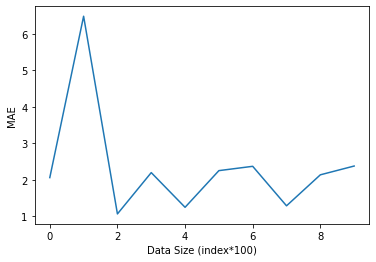

In [15]:
plt.figure(1)   
plt.plot(ftml_eval2)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [16]:
print(len(xtask_buffer))

24


In [17]:

meta_step = 10
loss_ftml3 = []
total = []
all_eval_loss3 = []
all_train_loss3 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval3 = []
ftml_time3 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml3, loss = train_maml(ftml3, meta_step, dtrainx, dtraint, dvalx, dvalt, ca=True)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml3, loss = update_procedure(ftml3,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml3, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time3.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval3.append(eval_loss)
    all_train_loss3.append(train_loss)
    all_eval_loss3.append(eval_task)


Task  0
Meta Update
Training is starting
0.001
Step 0 : loss = 6.679882049560547
0.0009755282581475768
Step 1 : loss = 6.641362190246582
0.0009045084971874737
Step 2 : loss = 6.600093841552734
0.0007938926261462366
Step 3 : loss = 6.557224750518799
0.0006545084971874737
Step 4 : loss = 6.518458843231201
0.0005
Step 5 : loss = 6.484800815582275
0.00034549150281252633
Step 6 : loss = 6.459051132202148
0.00020610737385376348
Step 7 : loss = 6.441213607788086
9.549150281252633e-05
Step 8 : loss = 6.430414199829102
2.4471741852423235e-05
Step 9 : loss = 6.425433158874512
Update Procedure
Step0 : loss = 6.430177688598633
Step1 : loss = 6.378194808959961
Step2 : loss = 6.330200672149658
Step3 : loss = 6.284365653991699
Step4 : loss = 6.2404680252075195
Step5 : loss = 6.197295665740967
Step6 : loss = 6.154111862182617
Step7 : loss = 6.111616611480713
Step8 : loss = 6.070333480834961
Step9 : loss = 6.030880928039551
Data stream Batch- 0 : loss = 4.6277079582214355
Meta Update
Training is starti

Step 7 : loss = 1.6714812119801838
9.549150281252633e-05
Step 8 : loss = 1.6694454352060955
2.4471741852423235e-05
Step 9 : loss = 1.6684901515642803
Update Procedure
Step0 : loss = 3.319131851196289
Step1 : loss = 3.268301486968994
Step2 : loss = 3.219724416732788
Step3 : loss = 3.172694683074951
Step4 : loss = 3.1270782947540283
Step5 : loss = 3.0831077098846436
Step6 : loss = 3.0422351360321045
Step7 : loss = 3.003225326538086
Step8 : loss = 2.9647796154022217
Step9 : loss = 2.92683744430542
Data stream Batch- 0 : loss = 12.734254360198975
Meta Update
Training is starting
0.001
Step 0 : loss = 1.6531071662902832
0.0009755282581475768
Step 1 : loss = 1.6427293022473655
0.0009045084971874737
Step 2 : loss = 1.6326127449671426
0.0007938926261462366
Step 3 : loss = 1.6232680678367615
0.0006545084971874737
Step 4 : loss = 1.6151469945907593
0.0005
Step 5 : loss = 1.6085085272789001
0.00034549150281252633
Step 6 : loss = 1.6036013960838318
0.00020610737385376348
Step 7 : loss = 1.60026085

Step 0 : loss = 1.5213485073889532
0.0009755282581475768
Step 1 : loss = 1.514498840254687
0.0009045084971874737
Step 2 : loss = 1.5077406697004796
0.0007938926261462366
Step 3 : loss = 1.5014480545702908
0.0006545084971874737
Step 4 : loss = 1.495933921389755
0.0005
Step 5 : loss = 1.491347398721273
0.00034549150281252633
Step 6 : loss = 1.487821812673457
0.00020610737385376348
Step 7 : loss = 1.4853840163598457
9.549150281252633e-05
Step 8 : loss = 1.4839243860294422
2.4471741852423235e-05
Step 9 : loss = 1.483246848894845
Update Procedure
Step0 : loss = 7.8895111083984375
Step1 : loss = 7.793539762496948
Step2 : loss = 7.703955888748169
Step3 : loss = 7.61622953414917
Step4 : loss = 7.530189752578735
Step5 : loss = 7.444063186645508
Step6 : loss = 7.355695605278015
Step7 : loss = 7.264613628387451
Step8 : loss = 7.175467252731323
Step9 : loss = 7.085075497627258
Data stream Batch- 1 : loss = 2.3402374982833862
Meta Update
Training is starting
0.001
Step 0 : loss = 1.475301750557172


Step 8 : loss = 0.041514588180124774
2.4471741852423235e-05
Step 9 : loss = 0.0414017758912678
Update Procedure
Step0 : loss = 7.900432586669922
Step1 : loss = 7.6681623458862305
Step2 : loss = 7.4673333168029785
Step3 : loss = 7.279800891876221
Step4 : loss = 7.100022792816162
Step5 : loss = 6.926281690597534
Step6 : loss = 6.762097120285034
Step7 : loss = 6.6082165241241455
Step8 : loss = 6.46042275428772
Step9 : loss = 6.3169310092926025
Data stream Batch- 1 : loss = 4.205904483795166
Meta Update
Training is starting
0.001
Step 0 : loss = 0.06607725561530005
0.0009755282581475768
Step 1 : loss = 0.0585722334720695
0.0009045084971874737
Step 2 : loss = 0.052565234082388966
0.0007938926261462366
Step 3 : loss = 0.0478580268760381
0.0006545084971874737
Step 4 : loss = 0.044445085030259235
0.0005
Step 5 : loss = 0.04232864635296398
0.00034549150281252633
Step 6 : loss = 0.041132451489646
0.00020610737385376348
Step 7 : loss = 0.04046368383661713
9.549150281252633e-05
Step 8 : loss = 0.0

Step 0 : loss = 0.2208145670933784
0.0009755282581475768
Step 1 : loss = 0.20314601329021156
0.0009045084971874737
Step 2 : loss = 0.18646115633300236
0.0007938926261462366
Step 3 : loss = 0.17131321944807465
0.0006545084971874737
Step 4 : loss = 0.15859935894804245
0.0005
Step 5 : loss = 0.1496966114216711
0.00034549150281252633
Step 6 : loss = 0.1435020924047552
0.00020610737385376348
Step 7 : loss = 0.13945691261516807
9.549150281252633e-05
Step 8 : loss = 0.1371625366161966
2.4471741852423235e-05
Step 9 : loss = 0.13613939467819486
Update Procedure
Step0 : loss = 4.187647143999736
Step1 : loss = 3.7224367459615073
Step2 : loss = 3.4114838441212973
Step3 : loss = 3.1162866353988647
Step4 : loss = 2.8137371142705283
Step5 : loss = 2.5197397470474243
Step6 : loss = 2.2514021595319114
Step7 : loss = 2.0196040272712708
Step8 : loss = 1.8528431753317516
Step9 : loss = 1.7478564778963726
Data stream Batch- 2 : loss = 3.880279064178467
Meta Update
Training is starting
0.001
Step 0 : loss =

Step 6 : loss = 0.02239230641030454
0.00020610737385376348
Step 7 : loss = 0.021966030856878125
9.549150281252633e-05
Step 8 : loss = 0.021663333288795543
2.4471741852423235e-05
Step 9 : loss = 0.021533070950204472
Update Procedure
Step0 : loss = 1.7415140469868977
Step1 : loss = 1.4411875406901042
Step2 : loss = 1.3680854241053264
Step3 : loss = 1.2639515747626622
Step4 : loss = 1.1972708304723103
Step5 : loss = 1.131268749634425
Step6 : loss = 1.0648763477802277
Step7 : loss = 1.0277225126822789
Step8 : loss = 0.9839922040700912
Step9 : loss = 0.944114421804746
Data stream Batch- 2 : loss = 2.5530279874801636
Meta Update
Training is starting
0.001
Step 0 : loss = 0.04064994574757275
0.0009755282581475768
Step 1 : loss = 0.037045063197857116
0.0009045084971874737
Step 2 : loss = 0.03429959420084986
0.0007938926261462366
Step 3 : loss = 0.0317332671099939
0.0006545084971874737
Step 4 : loss = 0.02959956558676935
0.0005
Step 5 : loss = 0.02790480502182357
0.00034549150281252633
Step 6 :

Step8 : loss = 1.4502998391787212
Step9 : loss = 1.3493393659591675
Data stream Batch- 2 : loss = 5.64552903175354
Meta Update
Training is starting
0.001
Step 0 : loss = 0.21602100086417445
0.0009755282581475768
Step 1 : loss = 0.20306413334980913
0.0009045084971874737
Step 2 : loss = 0.1904366119615695
0.0007938926261462366
Step 3 : loss = 0.17881491595418697
0.0006545084971874737
Step 4 : loss = 0.16864417703376625
0.0005
Step 5 : loss = 0.1602348514329815
0.00034549150281252633
Step 6 : loss = 0.15411804405434545
0.00020610737385376348
Step 7 : loss = 0.15006596644787043
9.549150281252633e-05
Step 8 : loss = 0.14769445828138536
2.4471741852423235e-05
Step 9 : loss = 0.14659843859367974
Update Procedure
Step0 : loss = 1.678157739341259
Step1 : loss = 1.5105984956026077
Step2 : loss = 1.4137886762619019
Step3 : loss = 1.3449489921331406
Step4 : loss = 1.2889745384454727
Step5 : loss = 1.2380261272192001
Step6 : loss = 1.1841997057199478
Step7 : loss = 1.1302182972431183
Step8 : loss =

Step 3 : loss = 0.04449605757474206
0.0006545084971874737
Step 4 : loss = 0.04330115198122801
0.0005
Step 5 : loss = 0.04247878549522122
0.00034549150281252633
Step 6 : loss = 0.04183634133351015
0.00020610737385376348
Step 7 : loss = 0.04139185557309705
9.549150281252633e-05
Step 8 : loss = 0.041132756444318005
2.4471741852423235e-05
Step 9 : loss = 0.04101397653843662
Update Procedure
Step0 : loss = 0.8285274654626846
Step1 : loss = 0.703317292034626
Step2 : loss = 0.667254351079464
Step3 : loss = 0.656942430883646
Step4 : loss = 0.6405596360564232
Step5 : loss = 0.6304102763533592
Step6 : loss = 0.6145577505230904
Step7 : loss = 0.605078000575304
Step8 : loss = 0.5962673202157021
Step9 : loss = 0.5847391113638878
Data stream Batch- 3 : loss = 3.4491231441497803
Meta Update
Training is starting
0.001
Step 0 : loss = 0.04723698670332892
0.0009755282581475768
Step 1 : loss = 0.04404401097647737
0.0009045084971874737
Step 2 : loss = 0.04245502949788186
0.0007938926261462366
Step 3 : los

Step 8 : loss = 0.027498175017674743
2.4471741852423235e-05
Step 9 : loss = 0.027313523129105875
Update Procedure
Step0 : loss = 0.964159406721592
Step1 : loss = 0.8616441190242767
Step2 : loss = 0.8701844215393066
Step3 : loss = 0.8270688652992249
Step4 : loss = 0.814949706196785
Step5 : loss = 0.7851842269301414
Step6 : loss = 0.7640335708856583
Step7 : loss = 0.7498842440545559
Step8 : loss = 0.7324688285589218
Step9 : loss = 0.7174950242042542
Data stream Batch- 3 : loss = 2.221921741962433
Meta Update
Training is starting
0.001
Step 0 : loss = 0.04651055651125807
0.0009755282581475768
Step 1 : loss = 0.040526184391659364
0.0009045084971874737
Step 2 : loss = 0.03546522962584055
0.0007938926261462366
Step 3 : loss = 0.032350568827277416
0.0006545084971874737
Step 4 : loss = 0.030610879836854336
0.0005
Step 5 : loss = 0.02931190656772949
0.00034549150281252633
Step 6 : loss = 0.028476756610480092
0.00020610737385376348
Step 7 : loss = 0.02787166023671341
9.549150281252633e-05
Step 8

Step6 : loss = 0.48381431587040424
Step7 : loss = 0.4758876897394657
Step8 : loss = 0.46859370172023773
Step9 : loss = 0.46121688932180405
Data stream Batch- 3 : loss = 1.819485604763031
Meta Update
Training is starting
0.001
Step 0 : loss = 0.12187715841246144
0.0009755282581475768
Step 1 : loss = 0.11655499536092877
0.0009045084971874737
Step 2 : loss = 0.11244040541340183
0.0007938926261462366
Step 3 : loss = 0.10929474007984163
0.0006545084971874737
Step 4 : loss = 0.1066012792158686
0.0005
Step 5 : loss = 0.10441179476943677
0.00034549150281252633
Step 6 : loss = 0.10277022947872985
0.00020610737385376348
Step 7 : loss = 0.10165025591817367
9.549150281252633e-05
Step 8 : loss = 0.10099240114037324
2.4471741852423235e-05
Step 9 : loss = 0.10068940145425104
Update Procedure
Step0 : loss = 1.0820537686347962
Step1 : loss = 0.9348438501358032
Step2 : loss = 0.9308723688125611
Step3 : loss = 0.9052273094654083
Step4 : loss = 0.8798999488353729
Step5 : loss = 0.8589740753173828
Step6 : 

In [18]:
print(len(xtask_buffer))

80


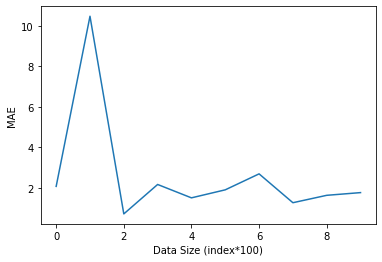

In [19]:
plt.figure(1)   
plt.plot(ftml_eval3)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [20]:

meta_step = 10
loss_ftml4 = []
total = []
all_eval_loss4 = []
all_train_loss4 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval4 = []
ftml_time4 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        if j < 4:
            ftml4, loss = orderone(ftml4, meta_step, dtrainx, dtraint, dvalx, dvalt)
        else:
            ftml4, loss = train_maml(ftml4, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml, loss = update_procedure(ftml4,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml4, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time4.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval4.append(eval_loss)
    all_train_loss4.append(train_loss)
    all_eval_loss4.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 6.507180690765381
Step 1 : loss = 6.507180690765381
Step 2 : loss = 6.507180690765381
Step 3 : loss = 6.507180690765381
Step 4 : loss = 6.507180690765381
Step 5 : loss = 6.507180690765381
Step 6 : loss = 6.507180690765381
Step 7 : loss = 6.507180690765381
Step 8 : loss = 6.507180690765381
Step 9 : loss = 6.507180690765381
Update Procedure
Step0 : loss = 6.509748458862305
Step1 : loss = 6.475587368011475
Step2 : loss = 6.441611289978027
Step3 : loss = 6.40714168548584
Step4 : loss = 6.371974468231201
Step5 : loss = 6.336726188659668
Step6 : loss = 6.300937652587891
Step7 : loss = 6.264676094055176
Step8 : loss = 6.227246284484863
Step9 : loss = 6.189220428466797
Data stream Batch- 0 : loss = 4.6560468673706055
Meta Update
Training is starting
Step 0 : loss = 6.58721661567688
Step 1 : loss = 6.58721661567688
Step 2 : loss = 6.58721661567688
Step 3 : loss = 6.58721661567688
Step 4 : loss = 6.58721661567688
Step 5 : loss = 6.58721661

Step7 : loss = 2.986584464708964
Step8 : loss = 2.920198122660319
Step9 : loss = 2.8580106496810913
Data stream Batch- 2 : loss = 12.19250202178955
Meta Update
Training is starting
Step 0 : loss = 1.2512598435084024
Step 1 : loss = 1.2512598435084024
Step 2 : loss = 1.2512598435084024
Step 3 : loss = 1.2512598435084024
Step 4 : loss = 1.2512598435084024
Step 5 : loss = 1.2512598435084024
Step 6 : loss = 1.2512598435084024
Step 7 : loss = 1.2512598435084024
Step 8 : loss = 1.2512598435084024
Step 9 : loss = 1.2512598435084024
Update Procedure
Step0 : loss = 2.512958526611328
Step1 : loss = 2.4145046770572662
Step2 : loss = 2.3578732013702393
Step3 : loss = 2.3088018596172333
Step4 : loss = 2.262968271970749
Step5 : loss = 2.2246711254119873
Step6 : loss = 2.190253436565399
Step7 : loss = 2.1578086018562317
Step8 : loss = 2.1274029910564423
Step9 : loss = 2.0980257093906403
Data stream Batch- 3 : loss = 12.291886329650879
Meta Update
Training is starting
Step 0 : loss = 1.304580847422281

Step 6 : loss = 1.1139998847056949
Step 7 : loss = 1.1012694729876424
Step 8 : loss = 1.0884181589242958
Step 9 : loss = 1.0754951090211906
Update Procedure
Step0 : loss = 2.2322871685028076
Step1 : loss = 1.6721429924170177
Step2 : loss = 1.6080537935098012
Step3 : loss = 1.6104850868384044
Step4 : loss = 1.558214505513509
Step5 : loss = 1.5064468085765839
Step6 : loss = 1.4593695104122162
Step7 : loss = 1.416652907927831
Step8 : loss = 1.3715440233548482
Step9 : loss = 1.3320731818675995
Data stream Batch- 5 : loss = 2.9307280778884888
Meta Update
Training is starting
Step 0 : loss = 1.1083554154705433
Step 1 : loss = 1.095445711780635
Step 2 : loss = 1.082553538697816
Step 3 : loss = 1.0696642451224818
Step 4 : loss = 1.0565643010572308
Step 5 : loss = 1.0433384560225976
Step 6 : loss = 1.0298273845087915
Step 7 : loss = 1.0162682293603817
Step 8 : loss = 1.0026200594676156
Step 9 : loss = 0.9885938094160149
Update Procedure
Step0 : loss = 2.2193345853260587
Step1 : loss = 1.6567418

Step7 : loss = 1.6734940521419048
Step8 : loss = 1.6547969318926334
Step9 : loss = 1.6390938870608807
Data stream Batch- 7 : loss = 2.1511170864105225
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.04576361385952615
Step 1 : loss = 0.04576361385952615
Step 2 : loss = 0.04576361385952615
Step 3 : loss = 0.04576361385952615
Step 4 : loss = 0.04576361385952615
Step 5 : loss = 0.04576361385952615
Step 6 : loss = 0.04576361385952615
Step 7 : loss = 0.04576361385952615
Step 8 : loss = 0.04576361385952615
Step 9 : loss = 0.04576361385952615
Update Procedure
Step0 : loss = 4.264416217803955
Step1 : loss = 4.125934600830078
Step2 : loss = 4.004199504852295
Step3 : loss = 3.8957936763763428
Step4 : loss = 3.7956900596618652
Step5 : loss = 3.699647903442383
Step6 : loss = 3.605222225189209
Step7 : loss = 3.510138750076294
Step8 : loss = 3.4144680500030518
Step9 : loss = 3.3184967041015625
Data stream Batch- 0 : loss = 4.049431562423706
Meta Update
Training is starting
Step 0 : loss = 

Step 2 : loss = 0.044527918743487084
Step 3 : loss = 0.044527918743487084
Step 4 : loss = 0.044527918743487084
Step 5 : loss = 0.044527918743487084
Step 6 : loss = 0.044527918743487084
Step 7 : loss = 0.044527918743487084
Step 8 : loss = 0.044527918743487084
Step 9 : loss = 0.044527918743487084
Update Procedure
Step0 : loss = 1.319774587949117
Step1 : loss = 1.2468796869119008
Step2 : loss = 1.1783865888913472
Step3 : loss = 1.1196806331475575
Step4 : loss = 1.0762145817279816
Step5 : loss = 1.0428008635838826
Step6 : loss = 1.006243720650673
Step7 : loss = 0.9735421389341354
Step8 : loss = 0.9499363998572031
Step9 : loss = 0.9355287353197733
Data stream Batch- 2 : loss = 3.031679391860962
Meta Update
Training is starting
Step 0 : loss = 0.049368122618652546
Step 1 : loss = 0.049368122618652546
Step 2 : loss = 0.049368122618652546
Step 3 : loss = 0.049368122618652546
Step 4 : loss = 0.049368122618652546
Step 5 : loss = 0.049368122618652546
Step 6 : loss = 0.049368122618652546
Step 7 : 

Step5 : loss = 0.5165495336055755
Step6 : loss = 0.4558069288730621
Step7 : loss = 0.42496706545352936
Step8 : loss = 0.3997738867998123
Step9 : loss = 0.3686981201171875
Data stream Batch- 4 : loss = 4.301695227622986
Meta Update
Training is starting
Step 0 : loss = 0.1637146720554972
Step 1 : loss = 0.15328018005245228
Step 2 : loss = 0.14302197849747114
Step 3 : loss = 0.1335910135477197
Step 4 : loss = 0.12478927431805897
Step 5 : loss = 0.11642563526981047
Step 6 : loss = 0.10901757385988242
Step 7 : loss = 0.10222272494740227
Step 8 : loss = 0.09633745857962854
Step 9 : loss = 0.090687089334675
Update Procedure
Step0 : loss = 1.2810503393411636
Step1 : loss = 0.9916820004582405
Step2 : loss = 0.9265808661778768
Step3 : loss = 0.8450035353501638
Step4 : loss = 0.7792452201247215
Step5 : loss = 0.7280807246764501
Step6 : loss = 0.6835978652040163
Step7 : loss = 0.6516780505577723
Step8 : loss = 0.629313088953495
Step9 : loss = 0.6096846461296082
Data stream Batch- 5 : loss = 4.3275

Step 1 : loss = 0.06562964457632761
Step 2 : loss = 0.06184263000774863
Step 3 : loss = 0.058140328251989816
Step 4 : loss = 0.05452676979922784
Step 5 : loss = 0.05095036016296063
Step 6 : loss = 0.04751499060758747
Step 7 : loss = 0.04445967297126897
Step 8 : loss = 0.042082543258157565
Step 9 : loss = 0.040113862289104026
Update Procedure
Step0 : loss = 0.9700041599571705
Step1 : loss = 0.6926356814801693
Step2 : loss = 0.6708542071282864
Step3 : loss = 0.6334275491535664
Step4 : loss = 0.6133984047919512
Step5 : loss = 0.6095931474119425
Step6 : loss = 0.6029865443706512
Step7 : loss = 0.5983457043766975
Step8 : loss = 0.5978336799889803
Step9 : loss = 0.5877015478909016
Data stream Batch- 7 : loss = 1.4013577997684479
Task  8
Meta Update
Training is starting
Step 0 : loss = 0.02940819515360876
Step 1 : loss = 0.02940819515360876
Step 2 : loss = 0.02940819515360876
Step 3 : loss = 0.02940819515360876
Step 4 : loss = 0.02940819515360876
Step 5 : loss = 0.02940819515360876
Step 6 : l

Step 7 : loss = 0.15038533579904723
Step 8 : loss = 0.15038533579904723
Step 9 : loss = 0.15038533579904723
Update Procedure
Step0 : loss = 0.6219511181116104
Step1 : loss = 0.5683484673500061
Step2 : loss = 0.5077440738677979
Step3 : loss = 0.4994325339794159
Step4 : loss = 0.4974401146173477
Step5 : loss = 0.48763032257556915
Step6 : loss = 0.4739062786102295
Step7 : loss = 0.4632047712802887
Step8 : loss = 0.4584321230649948
Step9 : loss = 0.4532025158405304
Data stream Batch- 1 : loss = 2.1836864352226257
Meta Update
Training is starting
Step 0 : loss = 0.15329380699563222
Step 1 : loss = 0.15329380699563222
Step 2 : loss = 0.15329380699563222
Step 3 : loss = 0.15329380699563222
Step 4 : loss = 0.15329380699563222
Step 5 : loss = 0.15329380699563222
Step 6 : loss = 0.15329380699563222
Step 7 : loss = 0.15329380699563222
Step 8 : loss = 0.15329380699563222
Step 9 : loss = 0.15329380699563222
Update Procedure
Step0 : loss = 0.44580337405204773
Step1 : loss = 0.4598091244697571
Step2 

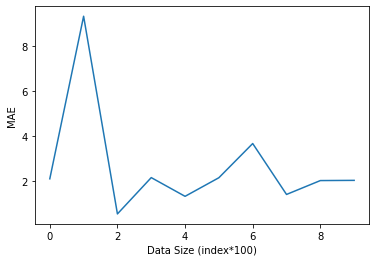

In [21]:
plt.figure(1)   
plt.plot(ftml_eval4)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [22]:

meta_step = 10
loss_ftml5 = []
total = []
all_eval_loss5 = []
all_train_loss5 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval5 = []
ftml_time5 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()

    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml5, loss = train_maml_msl(ftml5, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml5, loss = update_procedure(ftml5,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml5, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time5.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval5.append(eval_loss)
    all_train_loss5.append(train_loss)
    all_eval_loss5.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 13.561634063720703
Step 1 : loss = 20.02697775363922
Step 2 : loss = 19.914012637138367
Step 3 : loss = 19.798850984573367
Step 4 : loss = 19.683760142326353
Step 5 : loss = 19.57765371322632
Step 6 : loss = 19.48256395339966
Step 7 : loss = 19.392051372528076
Step 8 : loss = 19.303059797286988
Step 9 : loss = 19.2146715259552
Update Procedure
Step0 : loss = 6.443521499633789
Step1 : loss = 6.414474010467529
Step2 : loss = 6.3847975730896
Step3 : loss = 6.354989528656006
Step4 : loss = 6.325445175170898
Step5 : loss = 6.295804977416992
Step6 : loss = 6.26625919342041
Step7 : loss = 6.236452102661133
Step8 : loss = 6.206539154052734
Step9 : loss = 6.176385402679443
Data stream Batch- 0 : loss = 4.703200817108154
Meta Update
Training is starting
Step 0 : loss = 9.318020105361938
Step 1 : loss = 10.361467957496643
Step 2 : loss = 11.330398921966554
Step 3 : loss = 11.273931427001953
Step 4 : loss = 11.21699556827545
Step 5 : loss = 

Step8 : loss = 2.366316000620524
Step9 : loss = 2.312470634778341
Data stream Batch- 2 : loss = 10.991122722625732
Meta Update
Training is starting
Step 0 : loss = 0.7340762165984438
Step 1 : loss = 0.715094934428904
Step 2 : loss = 0.6983418694559347
Step 3 : loss = 0.6832417716964917
Step 4 : loss = 0.6692496127236842
Step 5 : loss = 0.6539217287488281
Step 6 : loss = 0.6390817655127977
Step 7 : loss = 0.6246667812092024
Step 8 : loss = 0.6108922802944909
Step 9 : loss = 0.5976845716414284
Update Procedure
Step0 : loss = 2.297370731830597
Step1 : loss = 2.1421498358249664
Step2 : loss = 2.05303230881691
Step3 : loss = 1.9858814775943756
Step4 : loss = 1.9309116005897522
Step5 : loss = 1.8884052336215973
Step6 : loss = 1.8592592477798462
Step7 : loss = 1.837102472782135
Step8 : loss = 1.8174659311771393
Step9 : loss = 1.793810099363327
Data stream Batch- 3 : loss = 10.885693550109863
Meta Update
Training is starting
Step 0 : loss = 0.7043900561582204
Step 1 : loss = 0.6853630896657705

Step 6 : loss = 0.4801827163415772
Step 7 : loss = 0.463130255638492
Step 8 : loss = 0.4457536203309248
Step 9 : loss = 0.4282671403834546
Update Procedure
Step0 : loss = 2.3374367157618203
Step1 : loss = 1.8470927774906158
Step2 : loss = 1.7592496673266094
Step3 : loss = 1.6510856449604034
Step4 : loss = 1.5657553374767303
Step5 : loss = 1.5158694684505463
Step6 : loss = 1.4547523061434429
Step7 : loss = 1.3910351395606995
Step8 : loss = 1.3332839111487071
Step9 : loss = 1.2825485269228618
Data stream Batch- 5 : loss = 2.125346302986145
Meta Update
Training is starting
Step 0 : loss = 0.5521453300630657
Step 1 : loss = 0.5353987331270778
Step 2 : loss = 0.5182809471937243
Step 3 : loss = 0.5011284381123904
Step 4 : loss = 0.4840737589946594
Step 5 : loss = 0.4667027982926181
Step 6 : loss = 0.44918113672973736
Step 7 : loss = 0.4316093521136598
Step 8 : loss = 0.41387825060626743
Step 9 : loss = 0.39617211009833014
Update Procedure
Step0 : loss = 2.2061160121645247
Step1 : loss = 1.69

Step7 : loss = 2.3602567799389362
Step8 : loss = 2.2875190041959286
Step9 : loss = 2.220242016017437
Data stream Batch- 7 : loss = 2.512932300567627
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.14310688226037271
Step 1 : loss = 0.1384200021699344
Step 2 : loss = 0.13371257163454317
Step 3 : loss = 0.1290426376473083
Step 4 : loss = 0.12437189130711766
Step 5 : loss = 0.1196596920417656
Step 6 : loss = 0.11498801507957906
Step 7 : loss = 0.11019406867822545
Step 8 : loss = 0.10547497652098509
Step 9 : loss = 0.10061463447796228
Update Procedure
Step0 : loss = 4.587221145629883
Step1 : loss = 4.390115261077881
Step2 : loss = 4.1951704025268555
Step3 : loss = 4.004443168640137
Step4 : loss = 3.8242852687835693
Step5 : loss = 3.659449577331543
Step6 : loss = 3.5080509185791016
Step7 : loss = 3.3833789825439453
Step8 : loss = 3.2754199504852295
Step9 : loss = 3.1799755096435547
Data stream Batch- 0 : loss = 4.921231031417847
Meta Update
Training is starting
Step 0 : loss = 0.1

Step 3 : loss = 0.023234541909778868
Step 4 : loss = 0.020660499891890095
Step 5 : loss = 0.019208612335760895
Step 6 : loss = 0.018920836093453925
Step 7 : loss = 0.018017093001887228
Step 8 : loss = 0.018201736949772774
Step 9 : loss = 0.017318354941796565
Update Procedure
Step0 : loss = 2.6579508781433105
Step1 : loss = 2.4800051053365073
Step2 : loss = 2.3856356143951416
Step3 : loss = 2.291199286778768
Step4 : loss = 2.2073463996251426
Step5 : loss = 2.114218791325887
Step6 : loss = 2.028816739718119
Step7 : loss = 1.946467121442159
Step8 : loss = 1.8620737791061401
Step9 : loss = 1.7851993242899578
Data stream Batch- 2 : loss = 3.7147756814956665
Meta Update
Training is starting
Step 0 : loss = 0.02709030672394174
Step 1 : loss = 0.025102674529239234
Step 2 : loss = 0.023098415769885382
Step 3 : loss = 0.021188990675546554
Step 4 : loss = 0.019871704954358277
Step 5 : loss = 0.019408373141128688
Step 6 : loss = 0.01834134301345572
Step 7 : loss = 0.018368918758445943
Step 8 : los

Step 9 : loss = 0.12309132970971623
Update Procedure
Step0 : loss = 1.1936147809028625
Step1 : loss = 0.9975468754768372
Step2 : loss = 0.8870977640151978
Step3 : loss = 0.7895207285881043
Step4 : loss = 0.6903923034667969
Step5 : loss = 0.5921982169151306
Step6 : loss = 0.503445428609848
Step7 : loss = 0.4322958797216415
Step8 : loss = 0.3968211680650711
Step9 : loss = 0.37500757575035093
Data stream Batch- 4 : loss = 3.0955262184143066
Meta Update
Training is starting
Step 0 : loss = 0.1845575654511309
Step 1 : loss = 0.1761096732180768
Step 2 : loss = 0.1678325230112514
Step 3 : loss = 0.15991976307495565
Step 4 : loss = 0.15233978909365548
Step 5 : loss = 0.145504901294863
Step 6 : loss = 0.13947292483214002
Step 7 : loss = 0.13381782778307838
Step 8 : loss = 0.1281908179030703
Step 9 : loss = 0.12267655258473689
Update Procedure
Step0 : loss = 1.0539796749750774
Step1 : loss = 0.8320024187366167
Step2 : loss = 0.8033263385295868
Step3 : loss = 0.7555743182698885
Step4 : loss = 0.7

Step8 : loss = 0.5468795320817402
Step9 : loss = 0.543135085276195
Data stream Batch- 6 : loss = 1.2137995958328247
Meta Update
Training is starting
Step 0 : loss = 0.05901927048397963
Step 1 : loss = 0.05389647337693037
Step 2 : loss = 0.04893937325179242
Step 3 : loss = 0.04418210798085283
Step 4 : loss = 0.03997940958723352
Step 5 : loss = 0.03699582908733369
Step 6 : loss = 0.03484102411413796
Step 7 : loss = 0.03268508055638454
Step 8 : loss = 0.031120669981570537
Step 9 : loss = 0.029461169011762364
Update Procedure
Step0 : loss = 0.9855029173195362
Step1 : loss = 0.6896448843181133
Step2 : loss = 0.6669343188405037
Step3 : loss = 0.6145722772926092
Step4 : loss = 0.5782968197017908
Step5 : loss = 0.5781193384900689
Step6 : loss = 0.5729768332093954
Step7 : loss = 0.5589917311444879
Step8 : loss = 0.5547553692013025
Step9 : loss = 0.5491799367591739
Data stream Batch- 7 : loss = 1.1964986026287079
Task  8
Meta Update
Training is starting
Step 0 : loss = 0.025204979469297895
Step 

Step 1 : loss = 0.12422628177850753
Step 2 : loss = 0.12004427843645915
Step 3 : loss = 0.11627578986448325
Step 4 : loss = 0.1132698981190684
Step 5 : loss = 0.1106897609446558
Step 6 : loss = 0.10834843894446956
Step 7 : loss = 0.10619222572537312
Step 8 : loss = 0.1042017702242494
Step 9 : loss = 0.1021772921100413
Update Procedure
Step0 : loss = 1.1443707048892975
Step1 : loss = 0.9631073176860809
Step2 : loss = 0.826144814491272
Step3 : loss = 0.7339721024036407
Step4 : loss = 0.6758307814598083
Step5 : loss = 0.6435380578041077
Step6 : loss = 0.6151470839977264
Step7 : loss = 0.5870500206947327
Step8 : loss = 0.5628789365291595
Step9 : loss = 0.538544550538063
Data stream Batch- 1 : loss = 2.0658705830574036
Meta Update
Training is starting
Step 0 : loss = 0.12280564624802567
Step 1 : loss = 0.11829958989471977
Step 2 : loss = 0.11430836362257771
Step 3 : loss = 0.11099952178123138
Step 4 : loss = 0.10792467849506822
Step 5 : loss = 0.10513435672636977
Step 6 : loss = 0.102728239

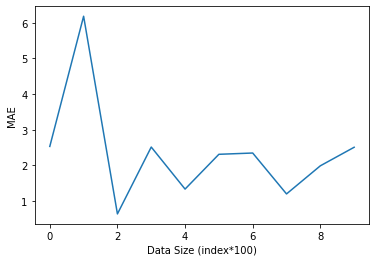

In [23]:
plt.figure(1)   
plt.plot(ftml_eval5)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [24]:

meta_step = 10
loss_ftml6 = []
total = []
all_eval_loss6 = []
all_train_loss6 = []
xtask_buffer = []
ttask_buffer = []
ftml_eval6 = []
ftml_time6 = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()
    if len(xtask_buffer) >= 24:
        xtask_buffer = xtask_buffer[8:]
        ttask_buffer = ttask_buffer[8:] 


    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        if j < 4:
            ftml6, loss = orderone(ftml6, meta_step, dtrainx, dtraint, dvalx, dvalt, ca=True)
        else:
            ftml6, loss = train_maml_msl(ftml6, meta_step, dtrainx, dtraint, dvalx, dvalt, ca=True)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml6, loss = update_procedure(ftml6,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml6, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time6.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval6.append(eval_loss)
    all_train_loss6.append(train_loss)
    all_eval_loss6.append(eval_task)


Task  0
Meta Update
Training is starting
0.001
Step 0 : loss = 6.845415115356445
0.0009755282581475768
Step 1 : loss = 6.845415115356445
0.0009045084971874737
Step 2 : loss = 6.845415115356445
0.0007938926261462366
Step 3 : loss = 6.845415115356445
0.0006545084971874737
Step 4 : loss = 6.845415115356445
0.0005
Step 5 : loss = 6.845415115356445
0.00034549150281252633
Step 6 : loss = 6.845415115356445
0.00020610737385376348
Step 7 : loss = 6.845415115356445
9.549150281252633e-05
Step 8 : loss = 6.845415115356445
2.4471741852423235e-05
Step 9 : loss = 6.845415115356445
Update Procedure
Step0 : loss = 6.850395679473877
Step1 : loss = 6.80362606048584
Step2 : loss = 6.7615742683410645
Step3 : loss = 6.727739334106445
Step4 : loss = 6.701056957244873
Step5 : loss = 6.680913925170898
Step6 : loss = 6.66606330871582
Step7 : loss = 6.6560211181640625
Step8 : loss = 6.649675369262695
Step9 : loss = 6.645181655883789
Data stream Batch- 0 : loss = 4.789707183837891
Meta Update
Training is starting

Step 5 : loss = 0.7724656363328297
0.00034549150281252633
Step 6 : loss = 0.7724656363328297
0.00020610737385376348
Step 7 : loss = 0.7724656363328297
9.549150281252633e-05
Step 8 : loss = 0.7724656363328297
2.4471741852423235e-05
Step 9 : loss = 0.7724656363328297
Update Procedure
Step0 : loss = 3.6516568660736084
Step1 : loss = 3.501988410949707
Step2 : loss = 3.370513677597046
Step3 : loss = 3.254172205924988
Step4 : loss = 3.1559873819351196
Step5 : loss = 3.0721938610076904
Step6 : loss = 3.002524495124817
Step7 : loss = 2.9410337805747986
Step8 : loss = 2.8855181336402893
Step9 : loss = 2.8382152318954468
Data stream Batch- 1 : loss = 10.92367172241211
Meta Update
Training is starting
0.001
Step 0 : loss = 0.9198060929775238
0.0009755282581475768
Step 1 : loss = 0.9198060929775238
0.0009045084971874737
Step 2 : loss = 0.9198060929775238
0.0007938926261462366
Step 3 : loss = 0.9198060929775238
0.0006545084971874737
Step 4 : loss = 0.9198060929775238
0.0005
Step 5 : loss = 0.919806

Step 9 : loss = 0.79423007757536
Update Procedure
Step0 : loss = 1.662831425666809
Step1 : loss = 1.3910788297653198
Step2 : loss = 1.2374193668365479
Step3 : loss = 1.1201967000961304
Step4 : loss = 1.0343595147132874
Step5 : loss = 0.9633041222890218
Step6 : loss = 0.9057766596476237
Step7 : loss = 0.8738492528597513
Step8 : loss = 0.8473745783170065
Step9 : loss = 0.8136215209960938
Data stream Batch- 2 : loss = 4.45746636390686
Meta Update
Training is starting
0.001
Step 0 : loss = 0.7300079894976483
0.0009755282581475768
Step 1 : loss = 0.7300079894976483
0.0009045084971874737
Step 2 : loss = 0.7300079894976483
0.0007938926261462366
Step 3 : loss = 0.7300079894976483
0.0006545084971874737
Step 4 : loss = 0.7300079894976483
0.0005
Step 5 : loss = 0.7300079894976483
0.00034549150281252633
Step 6 : loss = 0.7300079894976483
0.00020610737385376348
Step 7 : loss = 0.7300079894976483
9.549150281252633e-05
Step 8 : loss = 0.7300079894976483
2.4471741852423235e-05
Step 9 : loss = 0.730007

Step6 : loss = 2.666526325047016
Step7 : loss = 2.627423018217087
Step8 : loss = 2.5911077111959457
Step9 : loss = 2.5543800070881844
Data stream Batch- 3 : loss = 4.164803624153137
Meta Update
Training is starting
Step 0 : loss = 0.4139441257542774
Step 1 : loss = 0.40023398342437627
Step 2 : loss = 0.38700937570331656
Step 3 : loss = 0.3739434366188493
Step 4 : loss = 0.36106921247442936
Step 5 : loss = 0.34830628042807277
Step 6 : loss = 0.33568123244221093
Step 7 : loss = 0.3231173579360323
Step 8 : loss = 0.3106469493108648
Step 9 : loss = 0.2982395127717566
Update Procedure
Step0 : loss = 2.9671441197395323
Step1 : loss = 2.763250458240509
Step2 : loss = 2.7280776381492613
Step3 : loss = 2.6789761245250703
Step4 : loss = 2.614012950658798
Step5 : loss = 2.5607475340366364
Step6 : loss = 2.515453094244003
Step7 : loss = 2.4671543896198274
Step8 : loss = 2.4204703330993653
Step9 : loss = 2.3753435969352723
Data stream Batch- 4 : loss = 3.5624088048934937
Meta Update
Training is sta

Step 3 : loss = 0.5941150123913993
Step 4 : loss = 0.5716378233165189
Step 5 : loss = 0.5499793715077157
Step 6 : loss = 0.5300665779913643
Step 7 : loss = 0.5110295351490948
Step 8 : loss = 0.4923367843921005
Step 9 : loss = 0.47411084106127543
Update Procedure
Step0 : loss = 3.3175386786460876
Step1 : loss = 2.813183734814326
Step2 : loss = 2.6260733753442764
Step3 : loss = 2.5821780463059745
Step4 : loss = 2.473387454946836
Step5 : loss = 2.3765848577022552
Step6 : loss = 2.2944243401288986
Step7 : loss = 2.2174406747023263
Step8 : loss = 2.1464086721340814
Step9 : loss = 2.077309861779213
Data stream Batch- 5 : loss = 3.043852925300598
Meta Update
Training is starting
Step 0 : loss = 0.68258380086149
Step 1 : loss = 0.6595800608731104
Step 2 : loss = 0.6369052849393442
Step 3 : loss = 0.6156335385465348
Step 4 : loss = 0.5963996769785573
Step 5 : loss = 0.5779841683817128
Step 6 : loss = 0.5599114228754781
Step 7 : loss = 0.5428093570006468
Step 8 : loss = 0.5255638884348857
Step 9

Step3 : loss = 1.3853335593427931
Step4 : loss = 1.332488362278257
Step5 : loss = 1.2858569536890303
Step6 : loss = 1.253619453736714
Step7 : loss = 1.2193984240293503
Step8 : loss = 1.1967681518622808
Step9 : loss = 1.1752323593412126
Data stream Batch- 6 : loss = 2.9550492763519287
Meta Update
Training is starting
Step 0 : loss = 0.18151228488518706
Step 1 : loss = 0.1684053366467282
Step 2 : loss = 0.15568351244152953
Step 3 : loss = 0.1432296890363262
Step 4 : loss = 0.13147485676355342
Step 5 : loss = 0.120439929360032
Step 6 : loss = 0.1102976714988459
Step 7 : loss = 0.10108853673789034
Step 8 : loss = 0.09339539003259965
Step 9 : loss = 0.08681560160038541
Update Procedure
Step0 : loss = 1.8134660497307777
Step1 : loss = 1.4263739846646786
Step2 : loss = 1.43545538559556
Step3 : loss = 1.3861203491687775
Step4 : loss = 1.322403110563755
Step5 : loss = 1.279383361339569
Step6 : loss = 1.2288968116044998
Step7 : loss = 1.2035941816866398
Step8 : loss = 1.1669289357960224
Step9 : 

Step 0 : loss = 0.34720676465196504
0.0009755282581475768
Step 1 : loss = 0.34720676465196504
0.0009045084971874737
Step 2 : loss = 0.34720676465196504
0.0007938926261462366
Step 3 : loss = 0.34720676465196504
0.0006545084971874737
Step 4 : loss = 0.34720676465196504
0.0005
Step 5 : loss = 0.34720676465196504
0.00034549150281252633
Step 6 : loss = 0.34720676465196504
0.00020610737385376348
Step 7 : loss = 0.34720676465196504
9.549150281252633e-05
Step 8 : loss = 0.34720676465196504
2.4471741852423235e-05
Step 9 : loss = 0.34720676465196504
Update Procedure
Step0 : loss = 6.370415687561035
Step1 : loss = 6.193531513214111
Step2 : loss = 6.018601894378662
Step3 : loss = 5.84084415435791
Step4 : loss = 5.65725564956665
Step5 : loss = 5.462840557098389
Step6 : loss = 5.261704921722412
Step7 : loss = 5.059142589569092
Step8 : loss = 4.855489730834961
Step9 : loss = 4.650379180908203
Data stream Batch- 0 : loss = 4.978424549102783
Meta Update
Training is starting
0.001
Step 0 : loss = 0.3371

Step 2 : loss = 0.152692844832523
0.0007938926261462366
Step 3 : loss = 0.152692844832523
0.0006545084971874737
Step 4 : loss = 0.152692844832523
0.0005
Step 5 : loss = 0.152692844832523
0.00034549150281252633
Step 6 : loss = 0.152692844832523
0.00020610737385376348
Step 7 : loss = 0.152692844832523
9.549150281252633e-05
Step 8 : loss = 0.152692844832523
2.4471741852423235e-05
Step 9 : loss = 0.152692844832523
Update Procedure
Step0 : loss = 2.876201868057251
Step1 : loss = 2.6988046169281006
Step2 : loss = 2.53191339969635
Step3 : loss = 2.3742986917495728
Step4 : loss = 2.232774317264557
Step5 : loss = 2.109775424003601
Step6 : loss = 2.00169575214386
Step7 : loss = 1.9076915383338928
Step8 : loss = 1.8246678113937378
Step9 : loss = 1.7504806518554688
Data stream Batch- 1 : loss = 3.213020086288452
Meta Update
Training is starting
0.001
Step 0 : loss = 0.20807722400696504
0.0009755282581475768
Step 1 : loss = 0.20807722400696504
0.0009045084971874737
Step 2 : loss = 0.208077224006965

Step 5 : loss = 0.5953960779529538
0.00034549150281252633
Step 6 : loss = 0.5953960779529538
0.00020610737385376348
Step 7 : loss = 0.5953960779529538
9.549150281252633e-05
Step 8 : loss = 0.5953960779529538
2.4471741852423235e-05
Step 9 : loss = 0.5953960779529538
Update Procedure
Step0 : loss = 0.48432181278864544
Step1 : loss = 0.4300338427225749
Step2 : loss = 0.4188319444656372
Step3 : loss = 0.42466820279757184
Step4 : loss = 0.41407546897729236
Step5 : loss = 0.40303181608517963
Step6 : loss = 0.3959505210320155
Step7 : loss = 0.39001722633838654
Step8 : loss = 0.38471263150374096
Step9 : loss = 0.37874821325143176
Data stream Batch- 2 : loss = 1.7972804307937622
Meta Update
Training is starting
0.001
Step 0 : loss = 0.604078449226088
0.0009755282581475768
Step 1 : loss = 0.604078449226088
0.0009045084971874737
Step 2 : loss = 0.604078449226088
0.0007938926261462366
Step 3 : loss = 0.604078449226088
0.0006545084971874737
Step 4 : loss = 0.604078449226088
0.0005
Step 5 : loss = 0

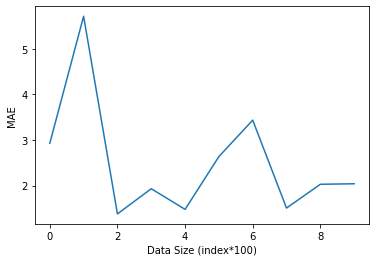

In [25]:
plt.figure(1)   
plt.plot(ftml_eval6)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

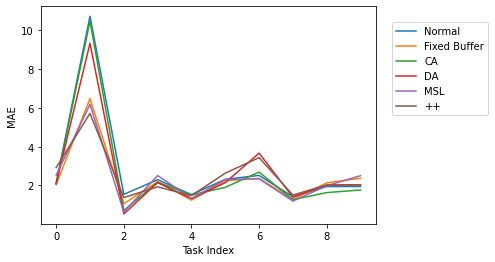

In [26]:
plt.figure(1)   
plt.plot(ftml_eval1)
plt.plot(ftml_eval2)
plt.plot(ftml_eval3)
plt.plot(ftml_eval4)
plt.plot(ftml_eval5)
plt.plot(ftml_eval6)
plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('MAE')
plt.show()

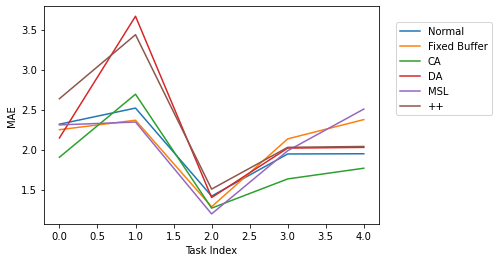

In [27]:
plt.figure(1)   
plt.plot(ftml_eval1[5:])
plt.plot(ftml_eval2[5:])
plt.plot(ftml_eval3[5:])
plt.plot(ftml_eval4[5:])
plt.plot(ftml_eval5[5:])
plt.plot(ftml_eval6[5:])
plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('MAE')
plt.show()

In [28]:
# plt.figure(1)  
# plt.plot(ftml_eval)

# plt.plot(jt_res)
# plt.plot(toe_res)
# plt.plot(sc_res)


# plt.legend(["Scratch", "Joint", "TOE", "FTML"], loc=(1.05, 0.5))
# plt.xlabel('Task Index')
# plt.ylabel('MAE')
# plt.show()

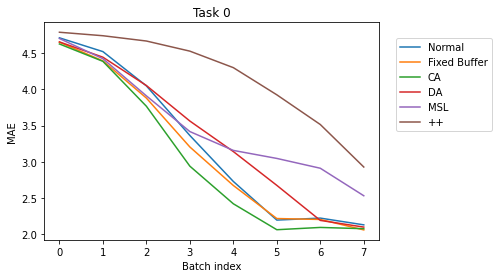

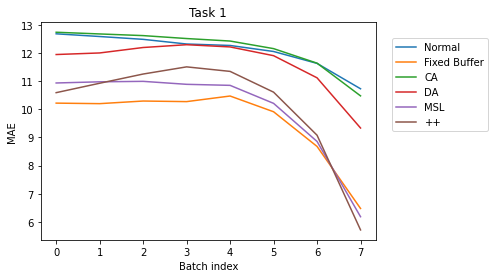

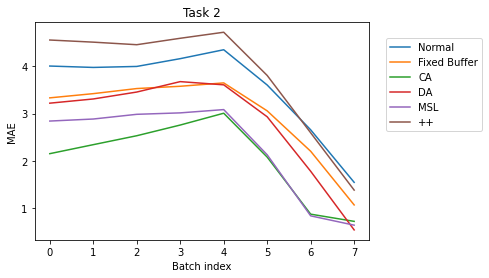

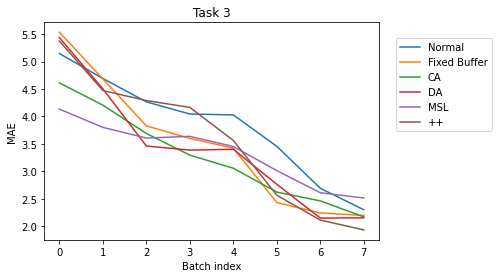

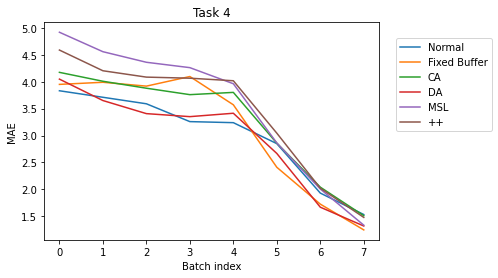

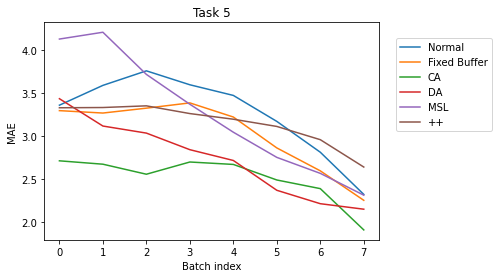

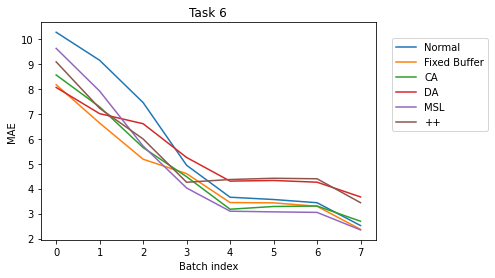

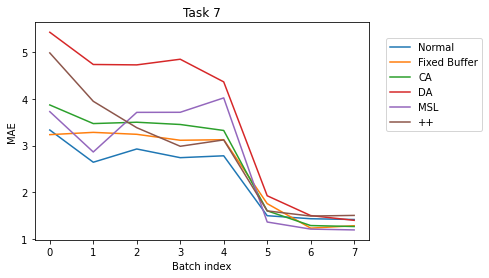

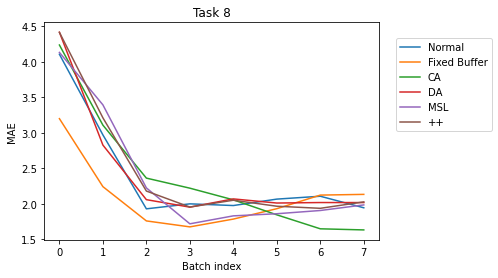

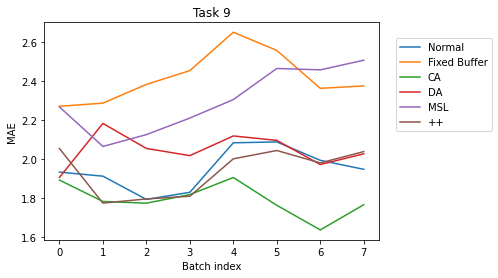

In [29]:
for i in range(10):
    plt.title("Task "+ str(i))
    plt.plot(all_eval_loss1[i])
    plt.plot(all_eval_loss2[i])
    plt.plot(all_eval_loss3[i])
    plt.plot(all_eval_loss4[i])
    plt.plot(all_eval_loss5[i])
    plt.plot(all_eval_loss6[i])

    plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
    plt.xlabel('Batch index')
    plt.ylabel('MAE')
    plt.show()

In [30]:
# plt.figure(1)   
# plt.plot(sc_time)
# plt.plot(jt_time)
# plt.plot(toe_time)
# plt.plot(ftml_time)

# plt.legend(["Scratch", "Joint", "TOE", "FTML"], loc=(1.05, 0.5))
# plt.xlabel('Task Index')
# plt.ylabel('Second')
# plt.show()

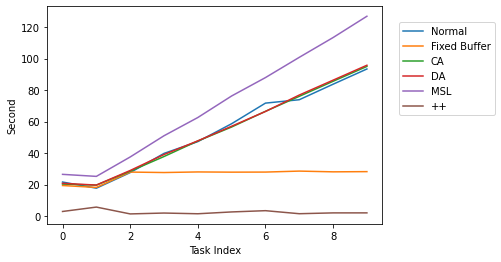

In [31]:
plt.figure(1)   
plt.plot(ftml_time1)
plt.plot(ftml_time2)
plt.plot(ftml_time3)
plt.plot(ftml_time4)
plt.plot(ftml_time5)
plt.plot(ftml_eval6)
plt.legend(["Normal", "Fixed Buffer", "CA", "DA", "MSL", "++"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('Second')
plt.show()